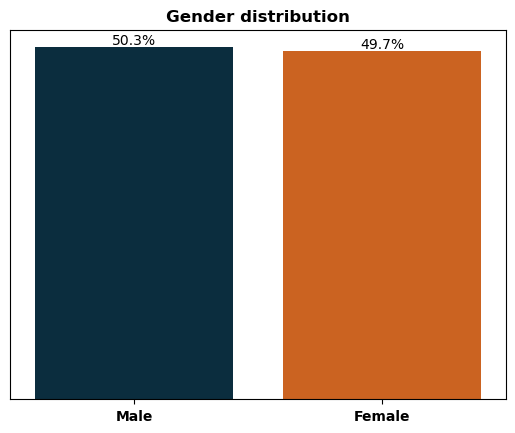

<Figure size 1200x800 with 0 Axes>

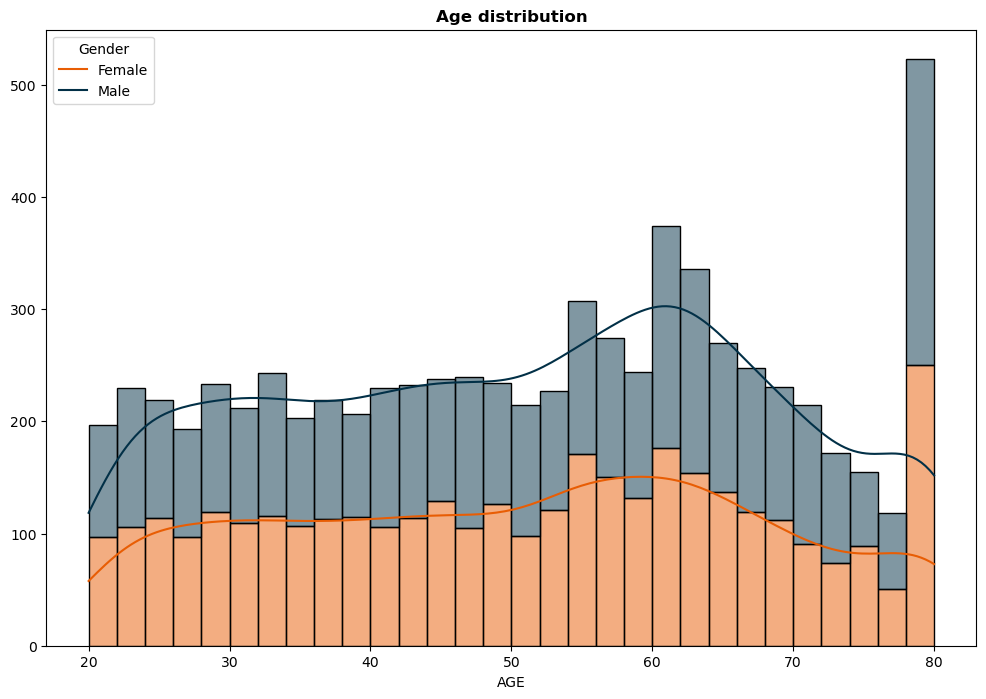

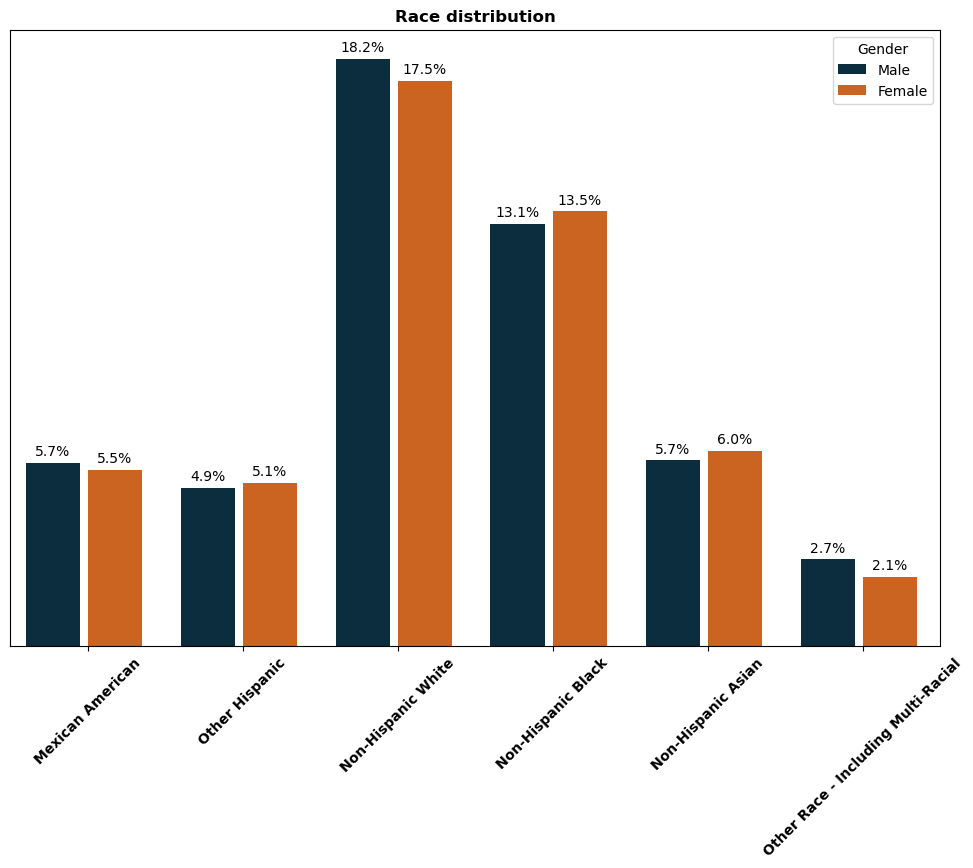

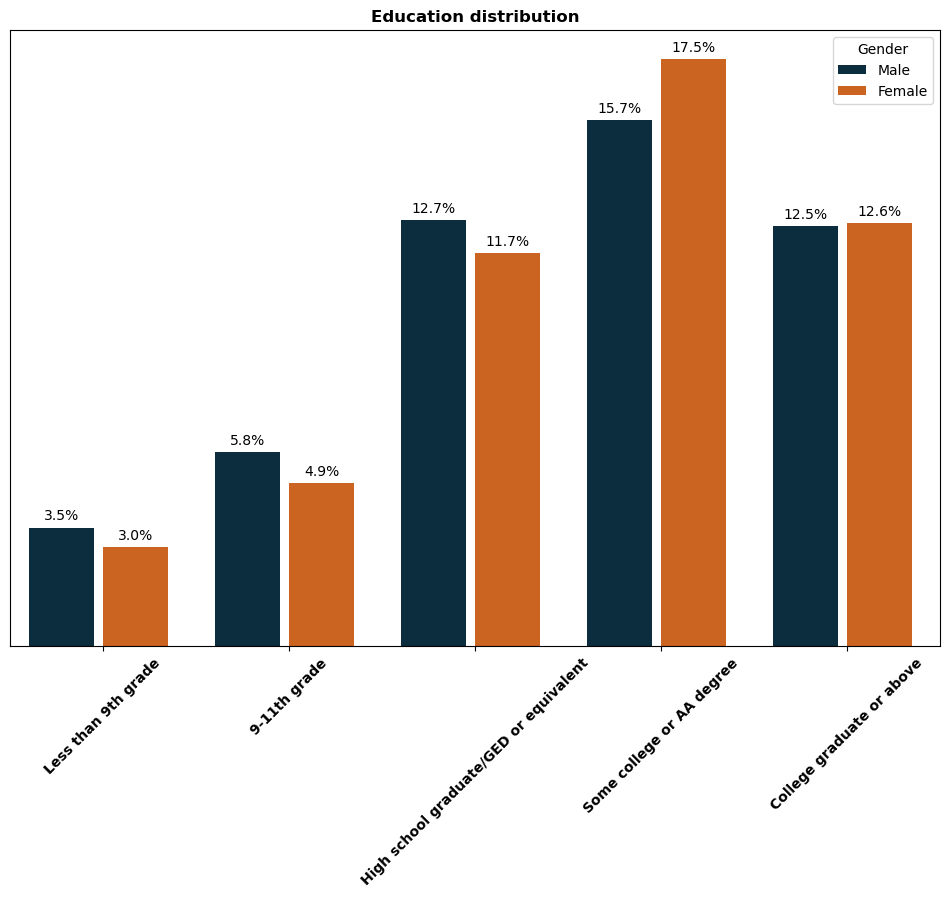

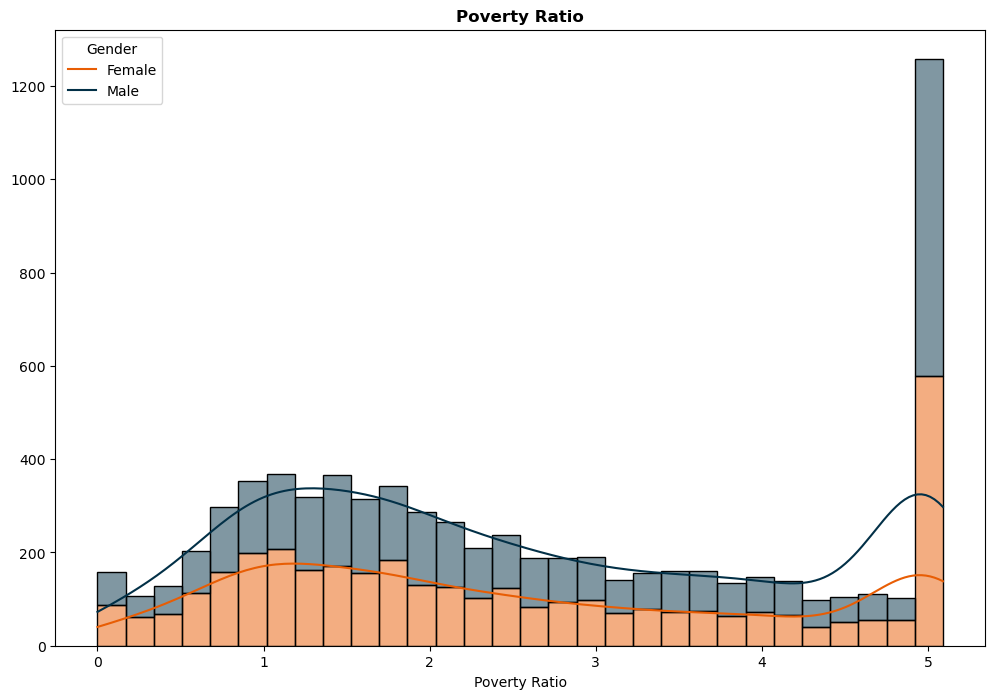

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def create_plot(data, x_col, hue_col=None, plot_type='count', title='', xlabel='', ylabel='', tick_labels=None, rotation=0, bar_width=0.35, kde=False, bins=30):
    plt.figure(figsize=(12, 8))

    if plot_type == 'count':
        ax = sns.countplot(data=data, x=x_col, hue=hue_col, palette=color_palette[:2], dodge=True)
    elif plot_type == 'hist':
        ax = sns.histplot(x=x_col, data=data, hue=hue_col, multiple='stack', kde=kde, bins=bins, palette=color_palette[:2])
        ax.legend(title=hue_col.capitalize(), labels=['Female', 'Male'])
    
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if tick_labels is not None:
        tick_positions = np.arange(len(tick_labels))
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, ha='center', rotation=rotation, fontweight='bold')

    if plot_type == 'count':
        ax.grid(False)
        ax.yaxis.set_visible(False)
        for i, patch in enumerate(ax.patches):
            patch.set_width(bar_width)

        total = len(data)
        counts = [count.get_height() for count in ax.patches]
        percentages = [(count / total) * 100 for count in counts]

        for count, percentage in zip(ax.patches, percentages):
            x = count.get_x() + count.get_width() / 2
            y = count.get_height()
            if percentage > 0:
                ax.annotate(f"{percentage:.1f}%", (x, y + 0.5), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

        if hue_col:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, ['Male', 'Female'], title=hue_col.capitalize(), loc='upper right')

    plt.show()

# Exemplo de uso para os gráficos mencionados:

color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']


sns.set_palette(sns.color_palette(color_palette))

pd.set_option('display.max_columns', None)


df_concatenado = pd.read_excel('dados_demograficos_streamlit.xlsx')

ax = sns.countplot(data=df_concatenado, x='GENDER', hue='GENDER', legend=False, palette=color_palette[:2])
ax.set_title('Gender distribution', fontweight='bold')

plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário


tick_positions = [0, 1]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Male', 'Female'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

total = len(df_concatenado)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')
plt.show()



create_plot(data=df_concatenado, x_col='AGE', hue_col='GENDER', plot_type='hist', title='Age distribution', xlabel='AGE', kde=True)





create_plot(data=df_concatenado, x_col='RACE', hue_col='GENDER', plot_type='count', title='Race distribution', tick_labels=['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other Race - Including Multi-Racial'], rotation=45)


create_plot(data=df_concatenado, x_col='EDUCATION', hue_col='GENDER', plot_type='count', title='Education distribution', tick_labels=['Less than 9th grade', '9-11th grade', 'High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above'], rotation=45)


create_plot(data=df_concatenado, x_col='POVERT_RATIO', hue_col='GENDER', plot_type='hist', title='Poverty Ratio', xlabel='Poverty Ratio', kde=True)



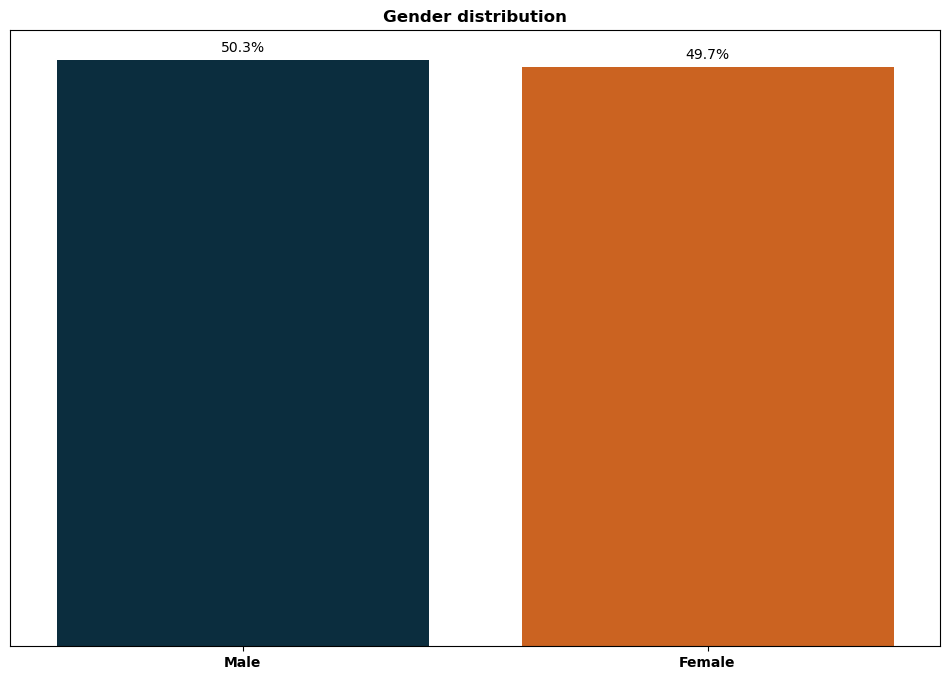

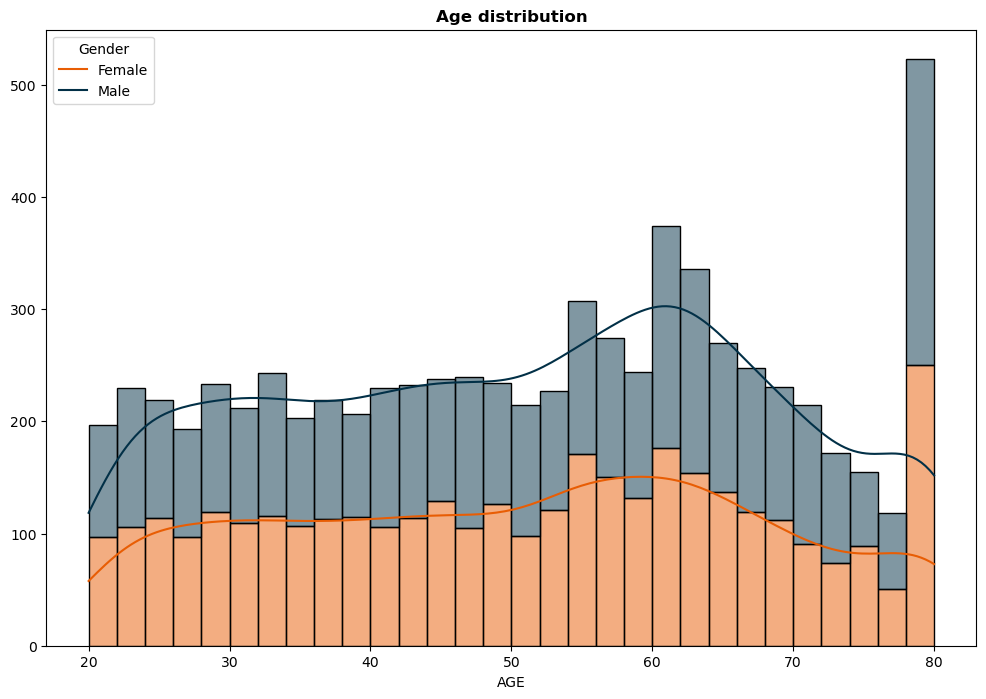

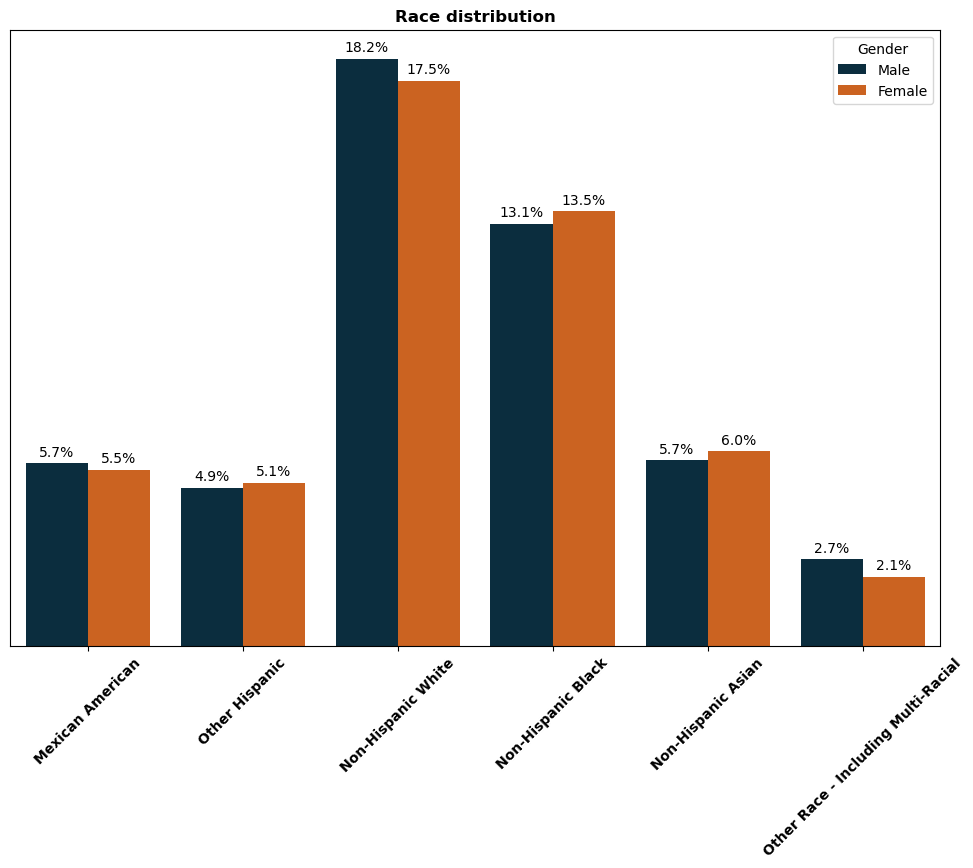

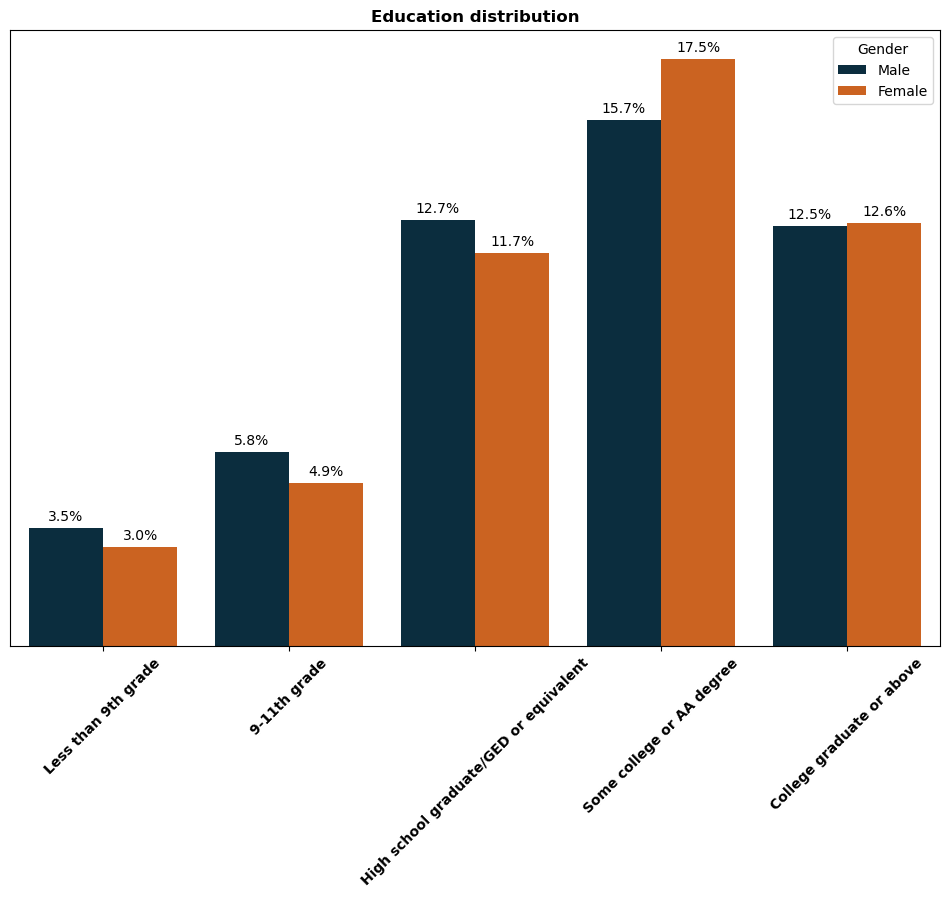

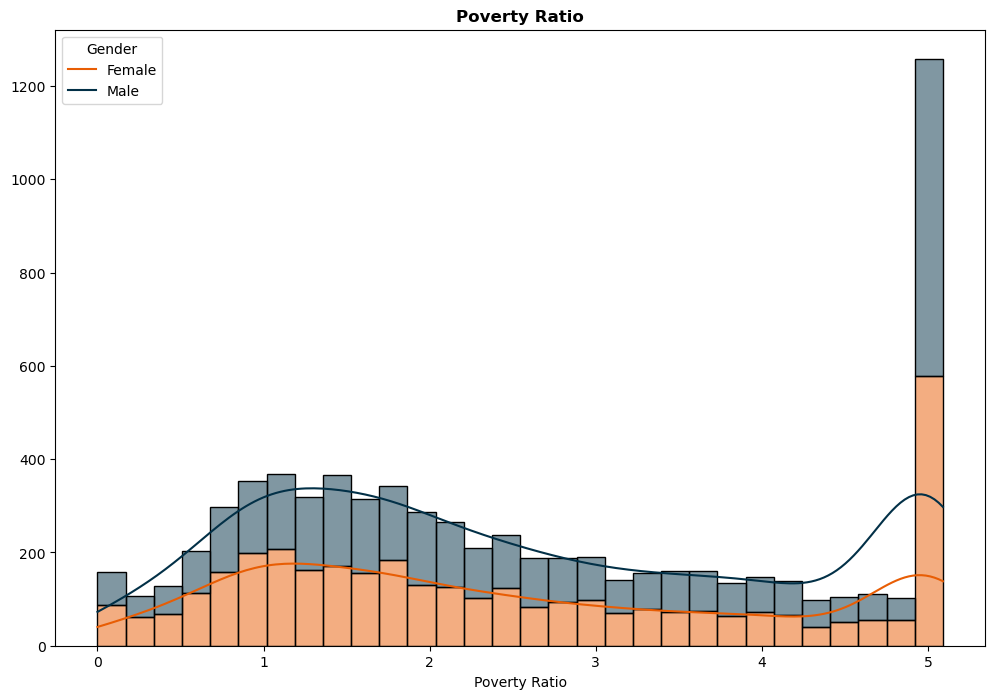

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def create_plot(data, x_col, hue_col=None, plot_type='count', title='', xlabel='', ylabel='', tick_labels=None, rotation=0, bar_width=0.35, kde=False, bins=30):
    fig, ax = plt.subplots(figsize=(12, 8))

    if plot_type == 'count':
        sns.countplot(data=data, x=x_col, hue=hue_col, palette=color_palette[:2], dodge=True, ax=ax)
        ax.grid(False)
        ax.yaxis.set_visible(False)

        # Calcular porcentagens e adicionar anotações diretamente
        total = len(data)
        for p in ax.patches:
            percentage = 100 * p.get_height() / total
            if percentage > 0:
                ax.annotate(f'{percentage:.1f}%', 
                            (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')
    
        if hue_col:
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, ['Male', 'Female'], title=hue_col.capitalize(), loc='upper right')
            
    elif plot_type == 'hist':
        sns.histplot(data=data, x=x_col, hue=hue_col, multiple='stack', kde=kde, bins=bins, palette=color_palette[:2], ax=ax)
        ax.legend(title=hue_col.capitalize(), labels=['Female', 'Male'])
    
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if tick_labels is not None:
        ax.set_xticks(np.arange(len(tick_labels)))
        ax.set_xticklabels(tick_labels, ha='center', rotation=rotation, fontweight='bold')

    plt.show()

# Configurações iniciais
color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette))
pd.set_option('display.max_columns', None)

# Carregamento dos dados
df_concatenado = pd.read_excel('dados_demograficos_streamlit.xlsx')

# Gráfico de distribuição de gênero
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df_concatenado, x='GENDER', hue='GENDER', legend=False, palette=color_palette[:2], ax=ax)
ax.set_title('Gender distribution', fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

# Calcular e adicionar porcentagens diretamente
total = len(df_concatenado)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.show()

# Outros gráficos
create_plot(data=df_concatenado, x_col='AGE', hue_col='GENDER', plot_type='hist', title='Age distribution', xlabel='AGE', kde=True)
create_plot(data=df_concatenado, x_col='RACE', hue_col='GENDER', plot_type='count', title='Race distribution', tick_labels=['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other Race - Including Multi-Racial'], rotation=45)
create_plot(data=df_concatenado, x_col='EDUCATION', hue_col='GENDER', plot_type='count', title='Education distribution', tick_labels=['Less than 9th grade', '9-11th grade', 'High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above'], rotation=45)
create_plot(data=df_concatenado, x_col='POVERT_RATIO', hue_col='GENDER', plot_type='hist', title='Poverty Ratio', xlabel='Poverty Ratio', kde=True)


In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from io import BytesIO
import base64

def run():
    # Configurações iniciais
    color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']
    sns.set_palette(sns.color_palette(color_palette))
    pd.set_option('display.max_columns', None)

    # Carregamento dos dados
    df_concatenado = pd.read_excel(r"C:\Users\leosz\Desktop\Streamlit_Nhanes\dados_demograficos_streamlit1.xlsx")

    # Função para criar os gráficos
    def create_plot(data, x_col, hue_col=None, plot_type='count', title='', xlabel='', ylabel='', tick_labels=None, rotation=0, kde=False, bins=30):
        fig, ax = plt.subplots(figsize=(10, 8))  # Ajuste o tamanho conforme necessário

        if plot_type == 'count':
            num_bars = data[x_col].nunique()
            dodge = False if num_bars == 2 else True
            
            sns.countplot(data=data, x=x_col, hue=hue_col, palette=color_palette[:2], dodge=dodge, ax=ax)
            ax.grid(False)
            ax.yaxis.set_visible(False)

            total = len(data)
            for p in ax.patches:
                percentage = 100 * p.get_height() / total
                if percentage > 0:
                    ax.annotate(f'{percentage:.1f}%', 
                                (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

            if hue_col:
                handles, _ = ax.get_legend_handles_labels()
                ax.legend(handles, ['Male', 'Female'], title=hue_col.capitalize(), loc='upper right')

        elif plot_type == 'hist':
            sns.histplot(data=data, x=x_col, hue=hue_col, multiple='stack', kde=kde, bins=bins, palette=color_palette[:2], ax=ax)
            ax.legend(title=hue_col.capitalize(), labels=['Female', 'Male'])

        ax.set_title(title, fontweight='bold')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        if tick_labels is not None:
            ax.set_xticks(np.arange(len(tick_labels)))
            ax.set_xticklabels(tick_labels, ha='center', rotation=rotation, fontweight='bold')

        # Ajustar o layout para evitar cortes
        plt.tight_layout()

        # Salvar a figura em um buffer para exibir no Streamlit
        buf = BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')  # Ajuste o bbox_inches para evitar cortes
        buf.seek(0)
        plt.close(fig)
        
        return buf

    # Definir os gráficos disponíveis e seus textos descritivos
    graphs = {
        'Gender distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'GENDER', hue_col='GENDER', plot_type='count', title='Gender distribution'),
            'description': 'Este gráfico mostra a distribuição de gênero entre os indivíduos do estudo.'
        },
        'Age distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'AGE', hue_col='GENDER', plot_type='hist', title='Age distribution', xlabel='AGE', kde=True),
            'description': 'Este gráfico apresenta a distribuição etária dos participantes, divididos por gênero.'
        },
        'Race distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'RACE', hue_col='GENDER', plot_type='count', title='Race distribution', tick_labels=['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other Race - Including Multi-Racial'], rotation=45),
            'description': 'Este gráfico mostra a distribuição racial dos participantes, divididos por gênero.'
        },
        'Education distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'EDUCATION', hue_col='GENDER', plot_type='count', title='Education distribution', tick_labels=['Less than 9th grade', '9-11th grade', 'High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above'], rotation=45),
            'description': 'Este gráfico mostra a distribuição de níveis educacionais entre os participantes, divididos por gênero.'
        },
        'Poverty Ratio': {
            'plot_func': lambda: create_plot(df_concatenado, 'POVERT_RATIO', hue_col='GENDER', plot_type='hist', title='Poverty Ratio', xlabel='Poverty Ratio', kde=True),
            'description': 'Este gráfico apresenta a razão de pobreza dos participantes, divididos por gênero.'
        }
    }

    # Interface do Streamlit
    st.title('Análise Demográfica Interativa')
    st.write('Selecione os gráficos que você deseja visualizar:')

    # Caixa de seleção múltipla para escolher os gráficos
    selected_graphs = st.multiselect('Escolha os gráficos:', options=list(graphs.keys()))

    # Exibir gráficos e textos associados
    for graph in selected_graphs:
        st.write(f"### {graph}")
        img_buf = graphs[graph]['plot_func']()
        
        # Exibir imagem centralizada
        st.markdown(
            f"<div style='display: flex; justify-content: center;'><img src='data:image/png;base64,{base64.b64encode(img_buf.getvalue()).decode()}' width='800'/></div>",
            unsafe_allow_html=True
        )
        st.write(graphs[graph]['description'])

if __name__ == "__main__":
    run()

In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from io import BytesIO
import base64

def run():
    # Configurações iniciais
    color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']
    sns.set_palette(sns.color_palette(color_palette))
    pd.set_option('display.max_columns', None)

    # Carregamento dos dados
    df_concatenado = pd.read_excel(r"C:\Users\leosz\Desktop\Streamlit_Nhanes\dados_demograficos_streamlit1.xlsx")

    # Função para criar os gráficos
    def create_plot(data, x_col, hue_col=None, plot_type='count', title='', xlabel='', ylabel='', tick_labels=None, rotation=0, kde=False, bins=30):
        fig, ax = plt.subplots(figsize=(10, 8))  # Ajuste o tamanho conforme necessário

        if plot_type == 'count':
            num_bars = data[x_col].nunique()
            dodge = False if num_bars == 2 else True
            
            sns.countplot(data=data, x=x_col, hue=hue_col, palette=color_palette[:2], dodge=dodge, ax=ax)
            ax.grid(False)
            ax.yaxis.set_visible(False)

            total = len(data)
            for p in ax.patches:
                percentage = 100 * p.get_height() / total
                if percentage > 0:
                    ax.annotate(f'{percentage:.1f}%', 
                                (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

            if hue_col:
                handles, _ = ax.get_legend_handles_labels()
                ax.legend(handles, ['Male', 'Female'], title=hue_col.capitalize(), loc='upper right')
                
            # Ajustar os rótulos dos ticks para gráficos com duas barras
            if hue_col is None and num_bars == 2:
                ax.set_xticks([0, 1])
                ax.set_xticklabels(['Male', 'Female'], ha='center')

        elif plot_type == 'hist':
            sns.histplot(data=data, x=x_col, hue=hue_col, multiple='stack', kde=kde, bins=bins, palette=color_palette[:2], ax=ax)
            ax.legend(title=hue_col.capitalize(), labels=['Female', 'Male'])

        ax.set_title(title, fontweight='bold')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        if tick_labels is not None:
            ax.set_xticks(np.arange(len(tick_labels)))
            ax.set_xticklabels(tick_labels, ha='center', rotation=rotation, fontweight='bold')

        # Ajustar o layout para evitar cortes
        plt.tight_layout()

        # Salvar a figura em um buffer para exibir no Streamlit
        buf = BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')  # Ajuste o bbox_inches para evitar cortes
        buf.seek(0)
        plt.close(fig)
        
        return buf

    # Definir os gráficos disponíveis e seus textos descritivos
    graphs = {
        'Gender distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'GENDER', hue_col=None, plot_type='count', title='Gender distribution'),
            'description': 'Este gráfico mostra a distribuição de gênero entre os indivíduos do estudo.'
        },
        'Age distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'AGE', hue_col='GENDER', plot_type='hist', title='Age distribution', xlabel='AGE', kde=True),
            'description': 'Este gráfico apresenta a distribuição etária dos participantes, divididos por gênero.'
        },
        'Race distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'RACE', hue_col='GENDER', plot_type='count', title='Race distribution', tick_labels=['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other Race - Including Multi-Racial'], rotation=45),
            'description': 'Este gráfico mostra a distribuição racial dos participantes, divididos por gênero.'
        },
        'Education distribution': {
            'plot_func': lambda: create_plot(df_concatenado, 'EDUCATION', hue_col='GENDER', plot_type='count', title='Education distribution', tick_labels=['Less than 9th grade', '9-11th grade', 'High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above'], rotation=45),
            'description': 'Este gráfico mostra a distribuição de níveis educacionais entre os participantes, divididos por gênero.'
        },
        'Poverty Ratio': {
            'plot_func': lambda: create_plot(df_concatenado, 'POVERT_RATIO', hue_col='GENDER', plot_type='hist', title='Poverty Ratio', xlabel='Poverty Ratio', kde=True),
            'description': 'Este gráfico apresenta a razão de pobreza dos participantes, divididos por gênero.'
        }
    }

    # Interface do Streamlit
    st.title('Interactive Demographic Analysis')
    st.write('Select the charts you want to view:')

    # Caixa de seleção múltipla para escolher os gráficos
    selected_graphs = st.multiselect('Choose the charts:', options=list(graphs.keys()))

    # Exibir gráficos e textos associados
    for graph in selected_graphs:
        st.write(f"### {graph}")
        img_buf = graphs[graph]['plot_func']()
        
        # Exibir imagem centralizada
        st.markdown(
            f"<div style='display: flex; justify-content: center;'><img src='data:image/png;base64,{base64.b64encode(img_buf.getvalue()).decode()}' width='800'/></div>",
            unsafe_allow_html=True
        )
        st.write(graphs[graph]['description'])

if __name__ == "__main__":
    run()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
from PIL import Image
import io
import base64



def run():
    st.title("Análise de Doenças Crônicas")

    # Introdução
    st.write("""
    **Introdução sobre Doenças Crônicas**
    Doenças crônicas, como diabetes, hipertensão, e doenças cardiovasculares, têm um impacto significativo na saúde pública. Estas condições são frequentemente associadas a uma qualidade de vida reduzida e a um aumento nas taxas de morbidade e mortalidade. A prevenção e o controle dessas doenças são essenciais para melhorar a saúde geral e reduzir os custos associados ao tratamento a longo prazo.
    """)

    # Carregar os dados
    df = pd.read_excel(r"C:\Users\leosz\Desktop\Streamlit_Nhanes\dados_demograficos_streamlit1.xlsx")
    color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']
    sns.set_palette(sns.color_palette(color_palette))

    # Função para plotar gráficos e retornar a imagem como bytes
    def plot_countplot(df, column, title, xticks_labels, hue='GENDER'):
        plt.figure(figsize=(6, 6), dpi=100)  # Ajuste o tamanho e a resolução da imagem

        # Criar o gráfico de contagem
        ax = sns.countplot(data=df, x=column, hue=hue, palette=color_palette[:2], dodge=True)

        # Ajustar o título e os ticks
        ax.set_title(title, fontweight='bold')

        unique_values = df[column].unique()
        tick_positions = np.arange(len(unique_values))
        ax.set_xticks(tick_positions)

        if len(xticks_labels) == len(unique_values):
            ax.set_xticklabels(xticks_labels, ha='center', rotation=45, fontweight='bold')
        else:
            st.warning(f"Number of xticks_labels ({len(xticks_labels)}) does not match number of unique values ({len(unique_values)}) in the column '{column}'")

        ax.set_xlabel('')
        ax.grid(False)
        ax.yaxis.set_visible(False)

        bar_width = 0.35
        for patch in ax.patches:
            patch.set_width(bar_width)

        total = len(df)
        counts = [patch.get_height() for patch in ax.patches]
        percentages = [(count / total) * 100 for count in counts]

        for patch, percentage in zip(ax.patches, percentages):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            if percentage > 0:
                ax.annotate(f"{percentage:.1f}%", (x, y + 0.5), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles, ['Male', 'Female'], title=hue, loc='upper right')

        plt.tight_layout(pad=1.0)

        # Salvar a figura em um buffer de bytes
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        img = Image.open(buf)

        return img

    # Checkboxes para seleção dos gráficos
    selected_graphs = []
    if st.checkbox('Diabetes'):
        selected_graphs.append('DIABETES')
    if st.checkbox('Kidney Disease'):
        selected_graphs.append('KIDNEY_DISEASE')
    if st.checkbox('Stroke'):
        selected_graphs.append('STROKE')
    if st.checkbox('High Cholesterol'):
        selected_graphs.append('HIGH_CHOLESTEROL')
    if st.checkbox('Liver Condition'):
        selected_graphs.append('LIVER_DISEASE')
    if st.checkbox('Heart Attack'):
        selected_graphs.append('HEART_ATTACK')
    if st.checkbox('BMI'):
        selected_graphs.append('BMI_Category')
    if st.checkbox('Blood Pressure'):
        selected_graphs.append('HIGH_PRESSURE')

    # Plotar os gráficos selecionados e exibir descrições
    for graph in selected_graphs:
        img = None
        description = ""
        if graph == 'DIABETES':
            img = plot_countplot(df, column='DIABETES', title='Diabetes Distribution', xticks_labels=['Diabetic', 'Not Diabetic', 'Borderline', "Don't Know"])
            description = "A diabetes é uma condição crônica que afeta a forma como o corpo processa o açúcar no sangue. Pode levar a várias complicações, incluindo doenças cardíacas e problemas de visão."
        elif graph == 'KIDNEY_DISEASE':
            img = plot_countplot(df, column='KIDNEY_DISEASE', title='Kidney Disease Distribution', xticks_labels=['Failing Kidneys', 'Healthy Kidneys', "Don't Know"])
            description = "Doenças renais podem prejudicar a capacidade dos rins de filtrar resíduos do sangue. A progressão pode levar à insuficiência renal e necessidade de diálise."
        elif graph == 'STROKE':
            img = plot_countplot(df, column='STROKE', title='Stroke Distribution', xticks_labels=['Stroke', 'Never had a stroke', "Don't Know"])
            description = "Um AVC ocorre quando o suprimento de sangue para uma parte do cérebro é interrompido. Pode causar paralisia e dificuldades de fala."
        elif graph == 'HIGH_CHOLESTEROL':
            img = plot_countplot(df, column='HIGH_CHOLESTEROL', title='High Cholesterol Distribution', xticks_labels=['High Cholesterol', 'Normal Cholesterol', 'Refused', "Don't Know"])
            description = "O colesterol alto pode aumentar o risco de doenças cardíacas e derrames. É importante monitorar e gerenciar os níveis de colesterol."
        elif graph == 'LIVER_DISEASE':
            img = plot_countplot(df, column='LIVER_DISEASE', title='Liver Conditions Distribution', xticks_labels=['Have any liver condition', 'No liver condition', "Don't Know"])
            description = "Doenças hepáticas podem afetar a função do fígado e levar a complicações graves. A detecção precoce é crucial para o tratamento eficaz."
        elif graph == 'HEART_ATTACK':
            img = plot_countplot(df, column='HEART_ATTACK', title='Heart attack Distribution', xticks_labels=['Had a heart Attack', 'Never had a heart attack', "Don't Know"])
            description = "Um ataque cardíaco ocorre quando o fluxo sanguíneo para uma parte do coração é bloqueado. Pode resultar em dano ao músculo cardíaco e ser fatal."
        elif graph == 'BMI_Category':
            img = plot_countplot(df, column='BMI_Category', title='BMI Distribution', xticks_labels=['Obesity', 'Overweight', 'Normal Weight', 'Underweight'])
            description = "O IMC é uma medida da gordura corporal com base na altura e peso. Categorias diferentes podem indicar riscos variados para a saúde."
        elif graph == 'HIGH_PRESSURE':
            img = plot_countplot(df, column='HIGH_PRESSURE', title='Hypertension Distribution', xticks_labels=['High Blood Pressure', 'Normal Blood Pressure', "Don't Know"])
            description = "A hipertensão é uma condição crônica que pode aumentar o risco de doenças cardíacas, AVC e outros problemas de saúde."

        if img:
            # Converter a imagem para bytes
            img_buffer = io.BytesIO()
            img.save(img_buffer, format='PNG')
            img_buffer.seek(0)
            
            # Mostrar a imagem centralizada
            st.markdown(
                f'<div style="text-align: center;"><img src="data:image/png;base64,{base64.b64encode(img_buffer.getvalue()).decode()}" style="width: 80%; max-width: 800px;" /></div>',
                unsafe_allow_html=True
            )
            st.write(description)